<a href="https://colab.research.google.com/github/alex-santi/analyzing-COVID-data/blob/main/AnalyzingCovidData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

fatal: destination path 'analyzing-COVID-data' already exists and is not an empty directory.
Please enter a command: pic


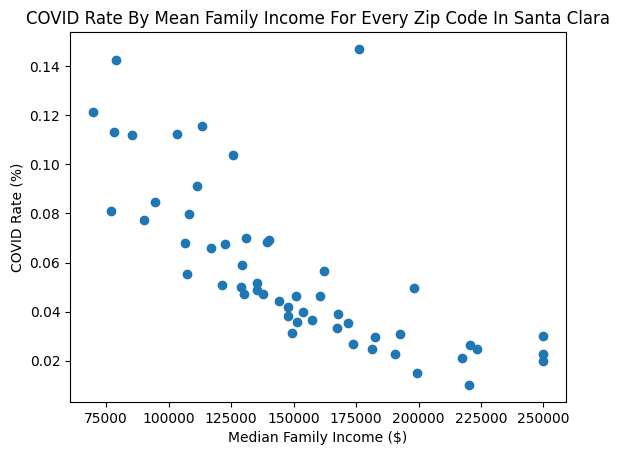

In [21]:
!git clone https://github.com/alex-santi/analyzing-COVID-data.git # gets files from github repository

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# arr of acceptable commands
valid_commands = ['pcc', 'pic', 'zip', 'vmfi', 'lc', 'ld']

chosen_command = input("Please enter a command: ")

# keep running until a valid command is taken
while chosen_command not in valid_commands:
    print("Invalid input, try again")
    chosen_command = input("Please enter a command: ")

try:
    if chosen_command == "pcc":
        country = input("Choose a Country: ")
        date1 = input("Start date (yyyy-mm-dd): ")
        date2 = input("End date (yyyy-mm-dd): ")

        # get country, date, and covid cases from csv file
        content = pd.read_csv("/content/analyzing-COVID-data/owid-covid-data.csv", usecols = ['location', 'date', 'total_cases'])

        content['location'] = content['location'].apply(lambda x : x.replace(' (country)', '')) # make the countries in the column valid elements
        content = content.loc[content['location'] == country] # get the sub data frame that has the country
        content = content[content['date'].between(date1, date2)] # get the interval of dates
        content = content.dropna() # drop the rows that have missing data
        content['date'] = pd.to_datetime(content['date']) # make the date valid elements to plot
        # set the title, x-axis, and y-axis names
        plt.title("Covid cases for " + country + " between " + date1 + " and " + date2)
        plt.xlabel("Date (yyyy-mm-dd)")
        plt.ylabel("Covid cases")

        # plot the data
        plt.scatter(content['date'], content['total_cases'], s = 5) # make the dot smaller to make the data more visible
        #print(content)
        plt.show()




    elif chosen_command == "pic":
        # get the zipcode and covid rate from first csv file
        content_f1 = pd.read_csv("/content/analyzing-COVID-data/COVID-19_cases_by_zip_code_of_residence.csv", usecols = ['zipcode', 'Rate'])

        # get the zipcode and median family income from the csv file, rename 'ZIPCode' to 'zipcode' to allow merging of dataframes
        content_f2 = pd.read_csv("/content/analyzing-COVID-data/income-by-zipcode-2019.csv", usecols = ['ZIP Code', 'Median family income (2019)'], skiprows = None).rename(columns={'ZIP Code':'zipcode'})

        # merge both data frames based on the zip code
        merged_content = pd.merge(content_f1, content_f2, on='zipcode', how='outer')
        merged_content = merged_content.dropna() # get rid or any row that has missing data
        merged_content['Rate'] = merged_content['Rate'].apply(lambda x : x / 100000) # get the actual rate by dividing every value in the column by 100,000
        merged_content['Median family income (2019)'] = merged_content['Median family income (2019)'].apply(lambda x : int(x[1:].replace(',', ''))) # make the median family income an int

        # set the title, x-axis, and y-axis names
        plt.title("COVID Rate By Mean Family Income For Every Zip Code In Santa Clara")
        plt.xlabel("Median Family Income ($)")
        plt.ylabel("COVID Rate (%)")

        # plot the data
        plt.scatter(merged_content['Median family income (2019)'], merged_content['Rate'])
        plt.show()

    elif chosen_command == "zip":
        chosen_zip_code = input("Enter a zipcode: ")

        # get the zipcode and covid rate from first csv file
        content = pd.read_csv("/content/analyzing-COVID-data/covid19vaccinesbyzipcode_test.csv", usecols = ['as_of_date', 'zip_code_tabulation_area', 'percent_of_population_fully_vaccinated', 'percent_of_population_partially_vaccinated'])
        content = content[content['zip_code_tabulation_area'] == int(chosen_zip_code)] # get the sub data frame that has the zip code

        # Make sure that when you are dropping rows with NAN that it doesn't drop the row if one column has data you need
        content = content.dropna() # dropped rows that had NAN in the columns of vaccine percentage (in this data both were NAN in every dropped row)
        content['as_of_date'] = pd.to_datetime(content['as_of_date']) # make the date valid elements to plot

        # set the title, x-axis, and y-axis names
        plt.title("Fraction Of Vaccinated Population By Day For Zip Code " + chosen_zip_code)

        plt.ylabel("Vaccinated Population Percenage (%)")

        # plot the data
        plt.scatter(content['as_of_date'], content['percent_of_population_fully_vaccinated'], s = 5, color = 'b', label='full_vaccinated') # make the dot smaller to make the data more visible
        plt.scatter(content['as_of_date'], content['percent_of_population_partially_vaccinated'], s = 5, color = 'r', label='partially_vaccinated')

        plt.legend() # allows the labels to show in the graph

        plt.show()

    elif chosen_command == "vmfi":
        # get the zip code and median family income from csv file
        content_f1 = pd.read_csv("/content/analyzing-COVID-data/income-by-zipcode-2019.csv", usecols = ['ZIP Code', 'Median family income (2019)'])

        # get zip code, percentage fully vaccinated, and percentage partially vaccinated
        content_f2 = pd.read_csv("/content/analyzing-COVID-data/covid19vaccinesbyzipcode_test.csv", usecols = ['zip_code_tabulation_area', 'percent_of_population_fully_vaccinated', 'percent_of_population_partially_vaccinated']).rename(columns={'zip_code_tabulation_area':'ZIP Code'})  # rename the zip code title to match the other data frame zip code title


        # Combine both data sets by zip code
        merged_content = pd.merge(content_f1, content_f2, on='ZIP Code', how='outer')
        merged_content = merged_content.dropna() # get rid of rows with missing data

        # if there are duplicate median family incomes get the mean of fully vaccinated and partially vaccinated (can be from different zip codes)
        merged_content['percent_of_population_fully_vaccinated'] = merged_content['percent_of_population_fully_vaccinated'].groupby(merged_content['Median family income (2019)']).transform('mean')
        merged_content['percent_of_population_partially_vaccinated'] = merged_content['percent_of_population_partially_vaccinated'].groupby(merged_content['Median family income (2019)']).transform('mean')

        merged_content = merged_content.drop_duplicates(subset = 'Median family income (2019)', keep='last') # drop duplicates of median family income except the last row (median was already calculated)

        merged_content['Median family income (2019)'] = merged_content['Median family income (2019)'].apply(lambda x : int(x[1:].replace(',', ''))) # make the median family income an int

        # set the title, x-axis, and y-axis names
        plt.title("Vaccinations By Mean Family Income In California")
        plt.xlabel("Median Family Income ($)")
        plt.ylabel("Vaccination Percentage (%)")

        # plot the data
        plt.scatter(merged_content['Median family income (2019)'], merged_content['percent_of_population_fully_vaccinated'], s = 5, color = 'b', label='full_vaccinated') # make the dot smaller to make the data more visible
        plt.scatter(merged_content['Median family income (2019)'], merged_content['percent_of_population_partially_vaccinated'], s = 5, color = 'r', label='partially_vaccinated')

        plt.legend() # allows the labels to show in the graph

        plt.show()

    elif chosen_command == "lc":
        chosen_county = input("Enter a County: ")

        content = pd.read_csv("/content/analyzing-COVID-data/covid19cases_test.csv", usecols = ['date', 'area', 'area_type', 'cases', 'cumulative_cases'])
        content = content.loc[content['area_type'] == 'County'] # get the sub data frame that has only Counties

        content = content.loc[content['area'] == chosen_county] # get the sub data frame that has the selected County
        content = content.dropna() # dropped rows that are missing data
        content['date'] =  pd.to_datetime(content['date']) # make the date valid elements to plot or manipulate
        content['date'] = content['date'].apply(lambda x: x.strftime('%Y-%m')) # manipulate the dates to only get the year-month

        # create a subset df with the first and last instance of the unique year-month elements
        cont1 = content.drop_duplicates( subset='date', keep='first' )
        cont2 = content.drop_duplicates( subset='date', keep='last' )

        content =  pd.concat( [cont1, cont2] ) # concatinate both subset data frames to creat a new data frame
        content = content.sort_index() # not ignoring the index will keep them in order of date and appearace based off the original df

        # keep a dict of every month and the covid cases in that month
        covid_per_month = {}
        for index, row in content.iterrows():
            # to get the covid cases in that month: for the first instance subtract the cases from the cumulative cases (x), for the second instance subtract the cumulative cases by the previous VALUE (x)
            if row['date'] not in covid_per_month:
                covid_per_month[row['date']] = (row['cumulative_cases'] - row['cases'])
            else:
                covid_per_month[row['date']] = row['cumulative_cases'] - covid_per_month[row['date']]

        # set the variable for the max_cases in a month
        max_month = [-1, -1]

        # compare all the months and their respective covid cases, get the max covid cases
        for key, value in covid_per_month.items():
            if value > max_month[1]:
                max_month = [key, value]

        # return the month with the most covid cases within that month
        print('\nFor ' + chosen_county + ' county, the month with the largest number of COVID cases (in that month) is', max_month[0])



    elif chosen_command == "ld":
        chosen_county = input("Enter a County: ")

        content = pd.read_csv("/content/analyzing-COVID-data/covid19cases_test.csv", usecols = ['date', 'area', 'area_type', 'deaths', 'cumulative_deaths'])
        content = content.loc[content['area_type'] == 'County'] # get the sub data frame that has only Counties
        content = content.loc[content['area'] == chosen_county] # get the sub data frame that has the selected County
        content = content.dropna() # dropped rows that are missing data

        content['date'] =  pd.to_datetime(content['date']) # make the date valid elements to plot or manipulate
        content['date'] = content['date'].apply(lambda x: x.strftime('%Y-%m')) # manipulate the dates to only get the year-month

        # create a subset df with the first and last instance of the unique year-month elements
        cont1 = content.drop_duplicates( subset='date', keep='first' )
        cont2 = content.drop_duplicates( subset='date', keep='last' )

        content =  pd.concat( [cont1, cont2] ) # concatinate both subset data frames to creat a new data frame
        content = content.sort_index() # not ignoring the index will keep them in order of date and appearace based off the original df

        # keep a dict of every month and the covid deaths in that month
        deaths_per_month = {}
        for index, row in content.iterrows():
            # to get the covid deaths in that month: for the first instance subtract the deaths from the cumulative deaths(x), for the second instance subtract the cumulative deaths by the previous VAL(x)
            if row['date'] not in deaths_per_month:
                deaths_per_month[row['date']] = (row['cumulative_deaths'] - row['deaths'])
            else:
                deaths_per_month[row['date']] = row['cumulative_deaths'] - deaths_per_month[row['date']]

        # set the variable for the max_deaths in a month
        max_month = [-1, -1]

        # compare all the months and their respective covid deaths, get the max covid deaths
        for key, value in deaths_per_month.items():
            if value > max_month[1]:
                max_month = [key, value]

        # return the month with the most covid deaths within that month
        print('\nFor ' + chosen_county + ' county, the month with the largest number of COVID deaths (in that month) is', max_month[0])

    else:
        print("choose another command")

except:
    print("try again")

<h1><center>Commands</center></h1>

---
**"pcc"** - Given a Country, start date, and end date, a scatter plot will be generated with number of COVID cases with respect to those dates.

**"pic"** - Generates a scatter plot of the rate (%) of COVID cases by mean family income for every zipcode in Santa Clara County

**"zip"** - Plots the fraction of vaccinated people by day based on the given zipcode

**"vmfi"** - Generates a scatter plot of vaccinations by mean family income for every zipcode in California (takes the average if there are multiple of the same mean family incomes)

**"lc"** - Given a County in California, will output the month with the largest number of COVID cases (in that month)

**"ld"** - Given a County in California, will output the month with the largest number of COVID deaths (in that month)